##### Now ,we are going to look power transformer.It has two types - 1) box-cox and 2)yeo-johnson method.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
img=pltimg.imread('box-cox.png')

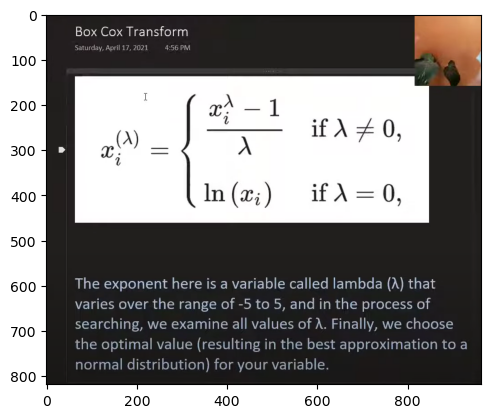

In [3]:
plt.imshow(img)